In [34]:
from requests import get
from bs4 import BeautifulSoup
import csv
import pandas as pd
import altair as alt

%matplotlib inline

In [2]:
url  = "https://www.49ers.com/team/players-roster/"

In [3]:
url

'https://www.49ers.com/team/players-roster/'

In [4]:
response = get(url)

In [5]:
response.ok, response.status_code

(True, 200)

## Now I am going to read the player names

* this is the first step
* second step

In [6]:
nfl = BeautifulSoup(response.content, 'html.parser')

In [8]:
nfl_main = nfl.find(id="main-content")
nfl_roster = nfl_main.find(summary="Roster")
nfl_roster_body = nfl_main.find("tbody")

In [9]:
players = nfl_roster_body.find_all("tr")

In [10]:
player_data = players[10].find_all("td")

In [11]:
player_data

[<td class="sorter-lastname">
 <div class="d3-o-media-object">
 <figure class="d3-o-media-object__figure">
 <a href="/team/players-roster/jack-heneghan/" title="Jack Heneghan">
 <picture is-lazy="/t_lazy"><!--[if IE 9]><video style="display: none; "><![endif]--><source media="(min-width:1024px)" srcset="https://res.cloudinary.com/nflclubs/image/private/t_thumb_squared/t_lazy/f_auto/49ers/qwohrhqgvz9hys84g1hy.jpg 1x, https://res.cloudinary.com/nflclubs/image/private/t_thumb_squared_2x/t_lazy/f_auto/49ers/qwohrhqgvz9hys84g1hy.jpg 2x, https://res.cloudinary.com/nflclubs/image/private/t_thumb_squared_3x/t_lazy/f_auto/49ers/qwohrhqgvz9hys84g1hy.jpg"/><source media="(min-width:768px)" srcset="https://res.cloudinary.com/nflclubs/image/private/t_thumb_squared/t_lazy/f_auto/49ers/qwohrhqgvz9hys84g1hy.jpg 1x, https://res.cloudinary.com/nflclubs/image/private/t_thumb_squared_2x/t_lazy/f_auto/49ers/qwohrhqgvz9hys84g1hy.jpg 2x, https://res.cloudinary.com/nflclubs/image/private/t_thumb_squared_3x/t_

In [12]:
items = []
items.append("a")
items.append("b")
items

['a', 'b']

In [13]:
players = []
player_trs = nfl_roster_body.find_all("tr")
for player_tr in player_trs:
    player_info = {}
    player_tds = player_tr.find_all("td")
    player_info["name"] = player_tds[0].text.strip()
    player_info["#"] = player_tds[1].text.strip()
    player_info["Pos"] = player_tds[2].text.strip()
    player_info["HT"] = player_tds[3].text.strip()
    player_info["WT"] = player_tds[4].text.strip()
    player_info["Age"] = player_tds[5].text.strip()
    player_info["Exp"] = player_tds[6].text.strip()
    player_info["College"] = player_tds[7].text.strip()
    
    players.append(player_info)
    print(player_info["College"])


Florida Atlantic
San Jose State
South Alabama
Montana State
Arizona State
Southern Arkansas
Montana State
Washington
North Texas
UCLA
Dartmouth
Tennessee
Florida State
Frostburg State
Houston
San Diego
Houston
Middle Tennessee State
Temple
Florida
Kansas State
Southern Miss
BYU
Washington
Notre Dame
Idaho
North Carolina
UCLA
Georgia Tech
Colorado State
Georgia Southern
Stanford
Mississippi State
Kansas State
Wyoming
Clemson
Ohio State
Southern Methodist
Central Michigan
USC
New Hampshire
Colorado
Utah
Pittsburgh
Western Kentucky
Incarnate Word (Tex.)
Florida State
Duke
Northern Illinois
Duke
Stanford
Louisiana Tech
Boise State
Utah
Iowa
Samford
Michigan
UCLA
Boise State
New Mexico State
Northwestern State-Louisiana
Stanford
Arizona
Louisville
Virginia
Purdue
Penn State
Southern Mississippi
Texas
Penn State
Iowa
Alabama
Virginia Tech
Notre Dame
Montana
Miami (Fla.)
Michigan State
Michigan State
Oregon
Eastern Washington
Georgia Southern
Oregon State
Appalachian State
Iowa
Oregon
Mississ

In [14]:
id(player_info)

140398075708976

In [98]:
id(players[2])

4546560072

In [15]:
players

[{'name': 'Alfred Morris',
  '#': '',
  'Pos': 'RB',
  'HT': '5-10',
  'WT': '222',
  'Age': '29',
  'Exp': '6',
  'College': 'Florida Atlantic'},
 {'name': 'Chris Gonzalez',
  '#': '67',
  'Pos': 'G',
  'HT': '6-3',
  'WT': '310',
  'Age': '23',
  'Exp': 'R',
  'College': 'San Jose State'},
 {'name': 'Wes Saxton',
  '#': '43',
  'Pos': 'TE',
  'HT': '6-4',
  'WT': '235',
  'Age': '25',
  'Exp': '1',
  'College': 'South Alabama'},
 {'name': 'JP Flynn',
  '#': '60',
  'Pos': 'OL',
  'HT': '6-5',
  'WT': '320',
  'Age': '24',
  'Exp': '1',
  'College': 'Montana State'},
 {'name': 'Will Sutton',
  '#': '66',
  'Pos': 'DL',
  'HT': '6-1',
  'WT': '209',
  'Age': '26',
  'Exp': '4',
  'College': 'Arizona State'},
 {'name': 'Cedric Thornton',
  '#': '63',
  'Pos': 'DL',
  'HT': '6-4',
  'WT': '290',
  'Age': '30',
  'Exp': '7',
  'College': 'Southern Arkansas'},
 {'name': 'Mike Person',
  '#': '68',
  'Pos': 'OL',
  'HT': '6-4',
  'WT': '300',
  'Age': '30',
  'Exp': '8',
  'College': 'Monta

In [157]:
with open('first_name.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Player-Name", "Player-college"])
    for player in players:
        writer = csv.writer(csv_file)
        writer.writerow(player["College"])


In [113]:
total = 0
for player in players:
    total = total + int(player["WT"])
avg = total/len(players)
print(int(avg))

240


In [129]:
ft, inches = "6-3".split("-")

In [130]:
ft

'6'

In [133]:
inches * 4

'3333'

In [154]:
total = 0
for player in players:
    ft, inches = player["HT"].split("-")
    inches = int(ft)*12 + int(inches)
    total = total + inches
avg = total/len(players)
leftover = avg - int(avg)
print(int(avg/12),"-", round(leftover))

6 - 1


In [18]:
df = pd.DataFrame(players)

In [19]:
df.head()

,#,Age,College,Exp,HT,Pos,WT,name
0,,29,Florida Atlantic,6,5-10,RB,222,Alfred Morris
1,67,23,San Jose State,R,6-3,G,310,Chris Gonzalez
2,43,25,South Alabama,1,6-4,TE,235,Wes Saxton
3,60,24,Montana State,1,6-5,OL,320,JP Flynn
4,66,26,Arizona State,4,6-1,DL,209,Will Sutton


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
#          89 non-null object
Age        89 non-null object
College    89 non-null object
Exp        89 non-null object
HT         89 non-null object
Pos        89 non-null object
WT         89 non-null object
name       89 non-null object
dtypes: object(8)
memory usage: 5.6+ KB


In [37]:
# df["Exp"] = df["Exp"].astype(int)
df["WT"] = df["WT"].astype(int)
df["Age"] = df["Age"].astype(int)

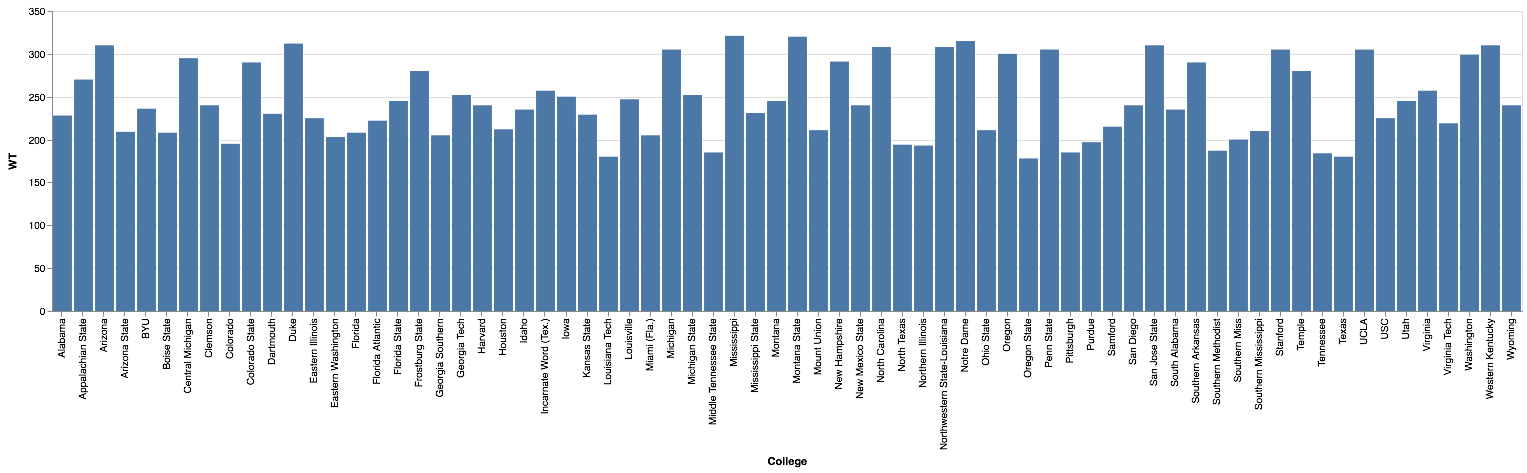

In [47]:
alt.Chart(df).mark_bar().encode(
    x="College",
    y="WT"
)

In [ ]:
data = [go.Bar(x=df.School,
            y=df.Gap)]

py.iplot(data, filename='jupyter-basic_bar')